C:\Users\danid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---Train---
Accuracy Score:  0.9049772382397572
---Test---
Accuracy Score:  0.9047098810390871
[[7178  117]
 [ 668  275]]


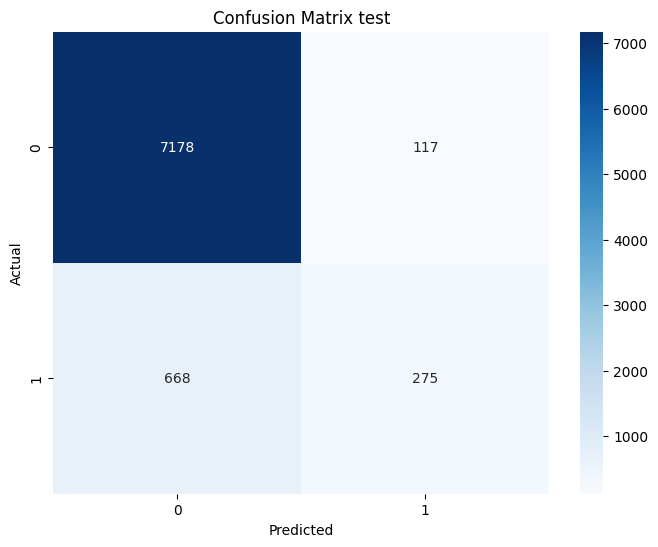

In [8]:
###··· BANK DATASET ···### 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import svm
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
import numpy as np

# Part 1: Selecting and analyzing the dataset 
# #Load the dataset
bank_dataset = pd.read_csv("A2-bank/bank-additional-full.csv", sep=';', header=0)
#Drop unnused columns
bank_dataset.drop(["default", "day_of_week","pdays"], axis=1, inplace=True)

#Replace unknown values with the mode
for column in ["marital", "job", "education", "housing", "loan"]:
    bank_dataset[column].replace("unknown", bank_dataset[column].mode()[0], inplace=True)

#Give a numerical value to the categorical data
columns_to_factorize = ["job", "marital", "education", "housing", "loan", "contact", "month", "poutcome", "y"]
for column in columns_to_factorize:
    bank_dataset[column], _ = pd.factorize(bank_dataset[column])


x_train = bank_dataset[["job", "marital", "education", "housing", "loan", "contact", "month", "duration", "campaign", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]]
y_train = bank_dataset[["y"]]

# Scale the data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

x_train, x_test, y_train, y_test = train_test_split(x_train_scaled, y_train, test_size=0.2, shuffle=True)

# Part 2: Implementation of MLR
model = svm.SVC(kernel='linear', C=1, gamma=1)
# Train the SVM model
history = model.fit(x_train, y_train)
# Predict the response for test dataset
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test)

print("---Train---")
print("Accuracy Score: ", accuracy_score(y_train, x_train_pred))
print("---Test---")
print("Accuracy Score: ", accuracy_score(y_test, x_test_pred))

# Generate the confusion matrix

confusion = confusion_matrix(y_test, x_test_pred, labels=[0, 1])
print(confusion)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix test')

plt.show()